In [1]:
import cv2
import os
import numpy as np
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
dataset = r'images'

In [3]:
categories = os.listdir(dataset)
labels = [label for label in range(len(categories))]
label_d = dict(zip(categories,labels))

In [4]:
print(categories)
print(labels)
print(label_d)

['mask', 'no_mask']
[0, 1]
{'mask': 0, 'no_mask': 1}


In [5]:
'''The images we have are all BGR images, lets convert them into Gray Scale'''
#dataset_np 

'The images we have are all BGR images, lets convert them into Gray Scale'

In [6]:
mask_img = os.path.join(dataset,'mask')
no_mask_img = os.path.join(dataset,'no_mask')
print(os.path.exists(mask_img))
print(os.path.exists(no_mask_img))

True
True


In [7]:
real_img = []
data=[]
target=[]
def convert_to_gray(path):
    for category in categories:
        folder_path=os.path.join(path,category)
        img_names=os.listdir(folder_path)
        
        for img_name in img_names:
            img_path=os.path.join(folder_path,img_name)
            img=cv2.imread(img_path)

            try:
                RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
                #Coverting the image into gray scale
                #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
                real_img.append(RGB_img)
                data.append(gray)
                target.append(label_d[category])
                #appending the image and the label(categorized) into the list (dataset)

            except Exception as e:
                print('Exception:',e)
                #if any exception rasied, the exception will be printed here. And pass to the next image
convert_to_gray(dataset)

Exception: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exce

In [8]:
data= np.array(data)/255.0

In [9]:
# I found some difficulties while training 
#a CNN with images that had a depth of 1 
#so I converted it into depth 3 but maintained its grayscale property
#https://stackoverflow.com/questions/40119743/convert-a-grayscale-image-to-a-3-channel-image
stacked_data = np.stack((data,)*3,axis = -1)
stacked_data.shape

(5042, 100, 100, 3)

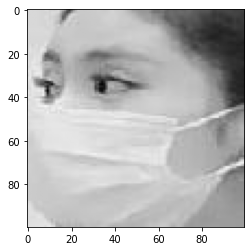

In [10]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
plt.imshow(stacked_data[1100])

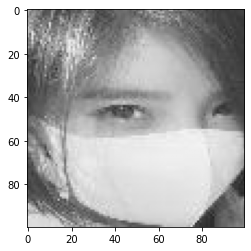

In [11]:
plt.imshow(stacked_data[6])
plt.show()

In [12]:
stacked_data.shape

(5042, 100, 100, 3)

In [13]:
print(target[1100])
print(target[6])
# So for the above images we can configure 
#that the data is correctly labelled

0
0


In [14]:
# We have 1113 images in total of people with mask and without mask
# So I think a batch size of 64 will be ok for now
batch_size = 64
epoch = 20
img_size = 100

In [15]:
'''Lets try this'''
import tensorflow as tf
target_n=tf.keras.utils.to_categorical(
    target, num_classes=2, dtype='int64'
)
target_n[1100]

array([1, 0], dtype=int64)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(stacked_data, target_n, random_state = 42, test_size = 0.11)

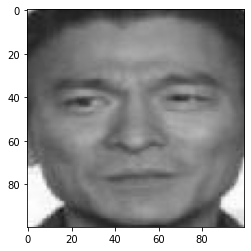

In [17]:
plt.imshow(X_train[8], cmap="gray", vmin=0, vmax=1)
plt.show()

In [18]:
Y_train[8]

array([0, 1], dtype=int64)

In [19]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [20]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)       

In [21]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [22]:
history = model.fit(X_train,Y_train, epochs= 25, validation_data = (X_test, Y_test), batch_size = 128)

Train on 4487 samples, validate on 555 samples
Epoch 1/25
4487/4487 [==============================] - 19s 4ms/step - loss: 0.6832 - accuracy: 0.5930 - val_loss: 0.6845 - val_accuracy: 0.5820
Epoch 2/25
4487/4487 [==============================] - 8s 2ms/step - loss: 0.6706 - accuracy: 0.6066 - val_loss: 0.6781 - val_accuracy: 0.5820
Epoch 3/25
4487/4487 [==============================] - 8s 2ms/step - loss: 0.6649 - accuracy: 0.6241 - val_loss: 0.6731 - val_accuracy: 0.6423
Epoch 4/25
4487/4487 [==============================] - 8s 2ms/step - loss: 0.6414 - accuracy: 0.6606 - val_loss: 0.6127 - val_accuracy: 0.6892
Epoch 5/25
4487/4487 [==============================] - 8s 2ms/step - loss: 0.5945 - accuracy: 0.6982 - val_loss: 0.5646 - val_accuracy: 0.7027
Epoch 6/25
4487/4487 [==============================] - 8s 2ms/step - loss: 0.5416 - accuracy: 0.7341 - val_loss: 0.5384 - val_accuracy: 0.7414
Epoch 7/25
4487/4487 [==============================] - 8s 2ms/step - loss: 0.4908 - acc

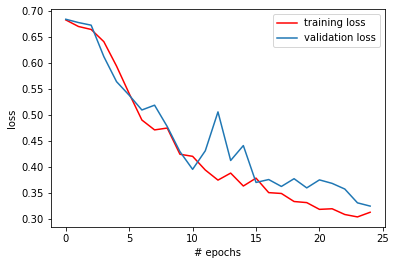

In [23]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

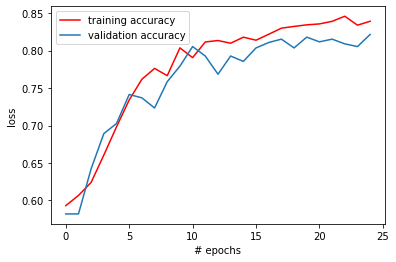

In [24]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [37]:
# We can do some hyperparameter research and some more
#data to decrease the variance and generalise the model 
#But for now I will just go with this
'''This function serializes the model and its weights
and saves it to a file named model.h5'''
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")   
print("Model Saved")

Model Saved
